# Modeling - Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

In [2]:
df_train = pd.read_pickle(r"feature_engineering_train_dataset.pkl")
df_valid = pd.read_pickle(r"feature_engineering_validation_dataset.pkl")

## CO(GT)

In [3]:
feature_cols = 'COGT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols] 

In [4]:
last_col_scale_index = 611+1
columns_to_scale = [a_col for a_col in X_train.iloc[:,:last_col_scale_index].columns]
scaler = StandardScaler()

# Fit and transform only selected columns
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_train[columns_to_scale] = X_train_scaled

X_valid_scaled = scaler.transform(X_valid[columns_to_scale])
X_valid[columns_to_scale] = X_valid_scaled

# Save the means and standard deviations for coefficient adjustment
feature_means = scaler.mean_
feature_stds = scaler.scale_

In [5]:
display(X_train.head(3))
display(X_valid.head(3))

,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,-0.051345,-0.633629,-0.338100,1.692903,0.096420,-0.894693,-0.462696,-2.054872,0.794870,-1.640633,...,0,0,0,0,0,0,0,0,1,0
1,-0.222804,-0.565075,-0.258855,1.662753,0.448479,-0.883444,-0.417915,-2.137872,0.867023,-1.678354,...,0,0,0,0,0,0,0,0,1,0
2,-0.489519,-0.880424,-0.626261,2.304517,-0.066069,-1.160913,-0.809753,-2.220872,0.993292,-1.687639,...,0,0,0,0,0,0,0,0,1,0


,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,0.148691,-0.002930,0.648853,-0.865540,-0.851432,-0.103531,0.186635,-0.657701,1.865145,1.138819,...,0,0,0,0,0,1,0,0,0,0
1,-0.513333,-0.400544,0.418324,-0.469283,-1.013921,-0.530984,-0.149226,-0.685368,1.871157,1.072082,...,0,0,0,0,0,1,0,0,0,0
2,-0.980085,-0.784448,-0.157999,0.073417,-1.203491,-0.898443,-0.471093,-0.726868,1.774953,0.907271,...,0,0,0,0,0,1,0,0,0,0


In [6]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

with open('regression_model_for_COGT.pkl', 'wb') as f:
    pickle.dump(model, f)

# Get standardized coefficients
standardized_coefficients = model.coef_
intercept = model.intercept_

# Assuming standardized_coefficients includes all features
scaled_coefs = standardized_coefficients[:last_col_scale_index]
unscaled_coefs = standardized_coefficients[last_col_scale_index:]

# Adjust only the scaled coefficients
original_scaled_coefs = scaled_coefs / feature_stds

# Combine back the full coefficient vector
original_coefficients = np.concatenate([original_scaled_coefs, unscaled_coefs])

# Adjust intercept
original_intercept = intercept - np.sum(original_scaled_coefs * feature_means)

In [8]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))


Train MAE    : 0.1807
Train RMSE   : 0.2672


In [9]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 0.3361
Validation RMSE  : 0.5178


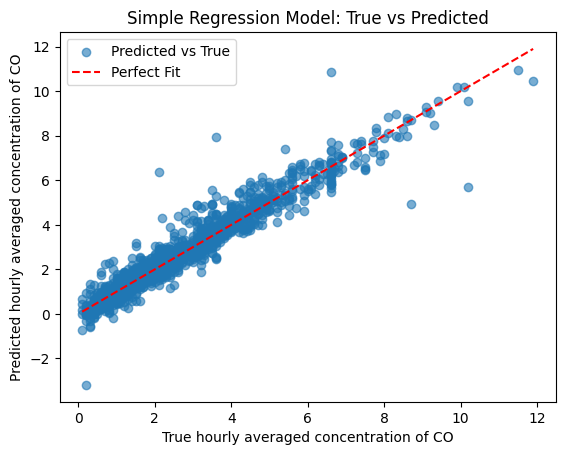

In [10]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of CO")
plt.ylabel("Predicted hourly averaged concentration of CO")
plt.legend()
plt.show()

## C6H6(GT)

In [11]:
feature_cols = 'C6H6GT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols] 

In [12]:
last_col_scale_index = 611+1
columns_to_scale = [a_col for a_col in X_train.iloc[:,:last_col_scale_index].columns]
scaler = StandardScaler()

# Fit and transform only selected columns
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_train[columns_to_scale] = X_train_scaled

X_valid_scaled = scaler.transform(X_valid[columns_to_scale])
X_valid[columns_to_scale] = X_valid_scaled

# Save the means and standard deviations for coefficient adjustment
feature_means = scaler.mean_
feature_stds = scaler.scale_

In [13]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,-0.198695,-0.051345,-0.338100,1.692903,0.096420,-0.894693,-0.462696,-2.054872,0.794870,-1.640633,...,0,0,0,0,0,0,0,0,1,0
1,-0.050760,-0.222804,-0.258855,1.662753,0.448479,-0.883444,-0.417915,-2.137872,0.867023,-1.678354,...,0,0,0,0,0,0,0,0,1,0
2,-0.420596,-0.489519,-0.626261,2.304517,-0.066069,-1.160913,-0.809753,-2.220872,0.993292,-1.687639,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,0.245109,0.148691,0.648853,-0.865540,-0.851432,-0.103531,0.186635,-0.657701,1.865145,1.138819,...,0,0,0,0,0,1,0,0,0,0
1,-0.272662,-0.513333,0.418324,-0.469283,-1.013921,-0.530984,-0.149226,-0.685368,1.871157,1.072082,...,0,0,0,0,0,1,0,0,0,0
2,-0.642498,-0.980085,-0.157999,0.073417,-1.203491,-0.898443,-0.471093,-0.726868,1.774953,0.907271,...,0,0,0,0,0,1,0,0,0,0


In [14]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

with open('regression_model_for_C6H6GT.pkl', 'wb') as f:
    pickle.dump(model, f)

# Get standardized coefficients
standardized_coefficients = model.coef_
intercept = model.intercept_

# Assuming standardized_coefficients includes all features
scaled_coefs = standardized_coefficients[:last_col_scale_index]
unscaled_coefs = standardized_coefficients[last_col_scale_index:]

# Adjust only the scaled coefficients
original_scaled_coefs = scaled_coefs / feature_stds

# Combine back the full coefficient vector
original_coefficients = np.concatenate([original_scaled_coefs, unscaled_coefs])

# Adjust intercept
original_intercept = intercept - np.sum(original_scaled_coefs * feature_means)

In [16]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))


Train MAE    : 0.5196
Train RMSE   : 0.8006


In [17]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 0.7811
Validation RMSE  : 1.4859


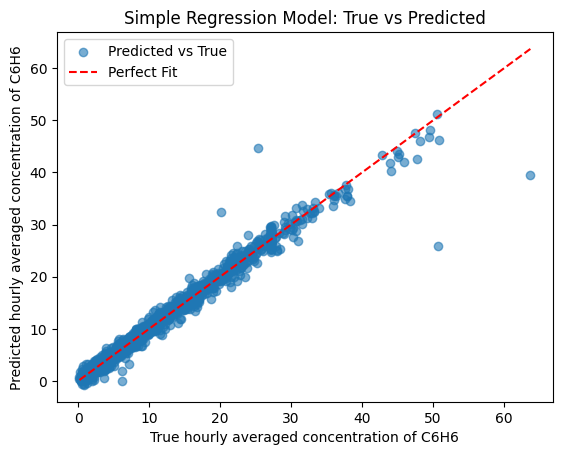

In [18]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of C6H6")
plt.ylabel("Predicted hourly averaged concentration of C6H6")
plt.legend()
plt.show()

## NOx(GT)

In [19]:
feature_cols = 'NOxGT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols] 

In [20]:
last_col_scale_index = 611+1
columns_to_scale = [a_col for a_col in X_train.iloc[:,:last_col_scale_index].columns]
scaler = StandardScaler()

# Fit and transform only selected columns
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_train[columns_to_scale] = X_train_scaled

X_valid_scaled = scaler.transform(X_valid[columns_to_scale])
X_valid[columns_to_scale] = X_valid_scaled

# Save the means and standard deviations for coefficient adjustment
feature_means = scaler.mean_
feature_stds = scaler.scale_

In [21]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,C6H6GT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,-0.198695,-0.051345,-0.633629,1.692903,0.096420,-0.894693,-0.462696,-2.054872,0.794870,-1.640633,...,0,0,0,0,0,0,0,0,1,0
1,-0.050760,-0.222804,-0.565075,1.662753,0.448479,-0.883444,-0.417915,-2.137872,0.867023,-1.678354,...,0,0,0,0,0,0,0,0,1,0
2,-0.420596,-0.489519,-0.880424,2.304517,-0.066069,-1.160913,-0.809753,-2.220872,0.993292,-1.687639,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,C6H6GT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,0.245109,0.148691,-0.002930,-0.865540,-0.851432,-0.103531,0.186635,-0.657701,1.865145,1.138819,...,0,0,0,0,0,1,0,0,0,0
1,-0.272662,-0.513333,-0.400544,-0.469283,-1.013921,-0.530984,-0.149226,-0.685368,1.871157,1.072082,...,0,0,0,0,0,1,0,0,0,0
2,-0.642498,-0.980085,-0.784448,0.073417,-1.203491,-0.898443,-0.471093,-0.726868,1.774953,0.907271,...,0,0,0,0,0,1,0,0,0,0


In [22]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

with open('regression_model_for_NOxGT.pkl', 'wb') as f:
    pickle.dump(model, f)

# Get standardized coefficients
standardized_coefficients = model.coef_
intercept = model.intercept_

# Assuming standardized_coefficients includes all features
scaled_coefs = standardized_coefficients[:last_col_scale_index]
unscaled_coefs = standardized_coefficients[last_col_scale_index:]

# Adjust only the scaled coefficients
original_scaled_coefs = scaled_coefs / feature_stds

# Combine back the full coefficient vector
original_coefficients = np.concatenate([original_scaled_coefs, unscaled_coefs])

# Adjust intercept
original_intercept = intercept - np.sum(original_scaled_coefs * feature_means)

In [24]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))


Train MAE    : 14.9755
Train RMSE   : 23.3727


In [25]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 51.3732
Validation RMSE  : 74.9846


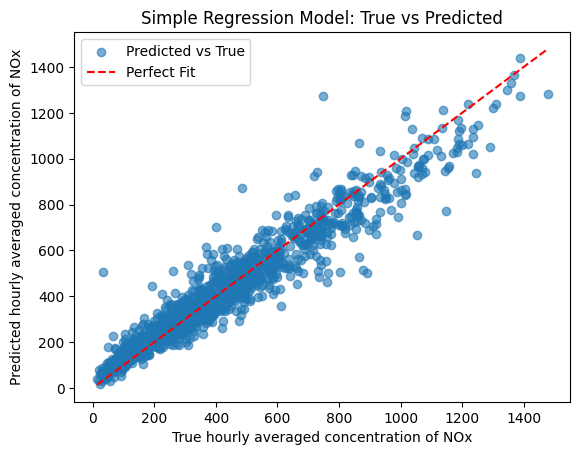

In [26]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NOx")
plt.ylabel("Predicted hourly averaged concentration of NOx")
plt.legend()
plt.show()

## NO2(GT)

In [27]:
feature_cols = 'NO2GT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols] 

In [28]:
last_col_scale_index = 611+1
columns_to_scale = [a_col for a_col in X_train.iloc[:,:last_col_scale_index].columns]
scaler = StandardScaler()

# Fit and transform only selected columns
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_train[columns_to_scale] = X_train_scaled

X_valid_scaled = scaler.transform(X_valid[columns_to_scale])
X_valid[columns_to_scale] = X_valid_scaled

# Save the means and standard deviations for coefficient adjustment
feature_means = scaler.mean_
feature_stds = scaler.scale_

In [29]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,-0.198695,-0.051345,-0.633629,-0.338100,1.692903,-0.894693,-0.462696,-2.054872,0.794870,-1.640633,...,0,0,0,0,0,0,0,0,1,0
1,-0.050760,-0.222804,-0.565075,-0.258855,1.662753,-0.883444,-0.417915,-2.137872,0.867023,-1.678354,...,0,0,0,0,0,0,0,0,1,0
2,-0.420596,-0.489519,-0.880424,-0.626261,2.304517,-1.160913,-0.809753,-2.220872,0.993292,-1.687639,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,0.245109,0.148691,-0.002930,0.648853,-0.865540,-0.103531,0.186635,-0.657701,1.865145,1.138819,...,0,0,0,0,0,1,0,0,0,0
1,-0.272662,-0.513333,-0.400544,0.418324,-0.469283,-0.530984,-0.149226,-0.685368,1.871157,1.072082,...,0,0,0,0,0,1,0,0,0,0
2,-0.642498,-0.980085,-0.784448,-0.157999,0.073417,-0.898443,-0.471093,-0.726868,1.774953,0.907271,...,0,0,0,0,0,1,0,0,0,0


In [30]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

with open('regression_model_for_NO2GT.pkl', 'wb') as f:
    pickle.dump(model, f)

# Get standardized coefficients
standardized_coefficients = model.coef_
intercept = model.intercept_

# Assuming standardized_coefficients includes all features
scaled_coefs = standardized_coefficients[:last_col_scale_index]
unscaled_coefs = standardized_coefficients[last_col_scale_index:]

# Adjust only the scaled coefficients
original_scaled_coefs = scaled_coefs / feature_stds

# Combine back the full coefficient vector
original_coefficients = np.concatenate([original_scaled_coefs, unscaled_coefs])

# Adjust intercept
original_intercept = intercept - np.sum(original_scaled_coefs * feature_means)

In [32]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))


Train MAE    : 5.9624
Train RMSE   : 8.1125


In [33]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 10.3662
Validation RMSE  : 14.0801


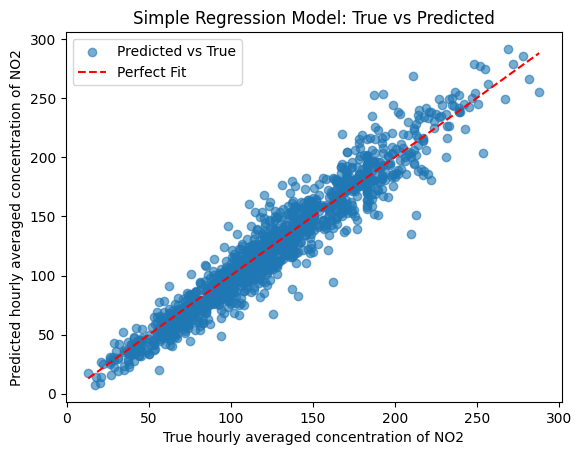

In [34]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NO2")
plt.ylabel("Predicted hourly averaged concentration of NO2")
plt.legend()
plt.show()